# Feature Exploration

Notebook to explore and catalog all features created so far in order to evaluate how to best use them

In [99]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
listings_original = pd.read_csv('Datasources/inside_airbnb/listings.csv')

In [26]:
listings = pd.read_csv('listings_augmented_2018-05-18_V2.csv',low_memory=False)
listings = listings.drop(columns='Unnamed: 0')

IMPORTANT! Data Quality Issue - Row 4325 gets split into two when augmented dataframe is created in dataprep - it's ok to just drop the two rows

In [27]:
listings = listings.drop(listings.index[4324:4326])

In [29]:
listings.shape

(5752, 601)

# Nulls Analysis

In [30]:
null_cols_orig = listings_original.columns[listings_original.isnull().any()]
null_cols = listings.columns[listings.isnull().any()]

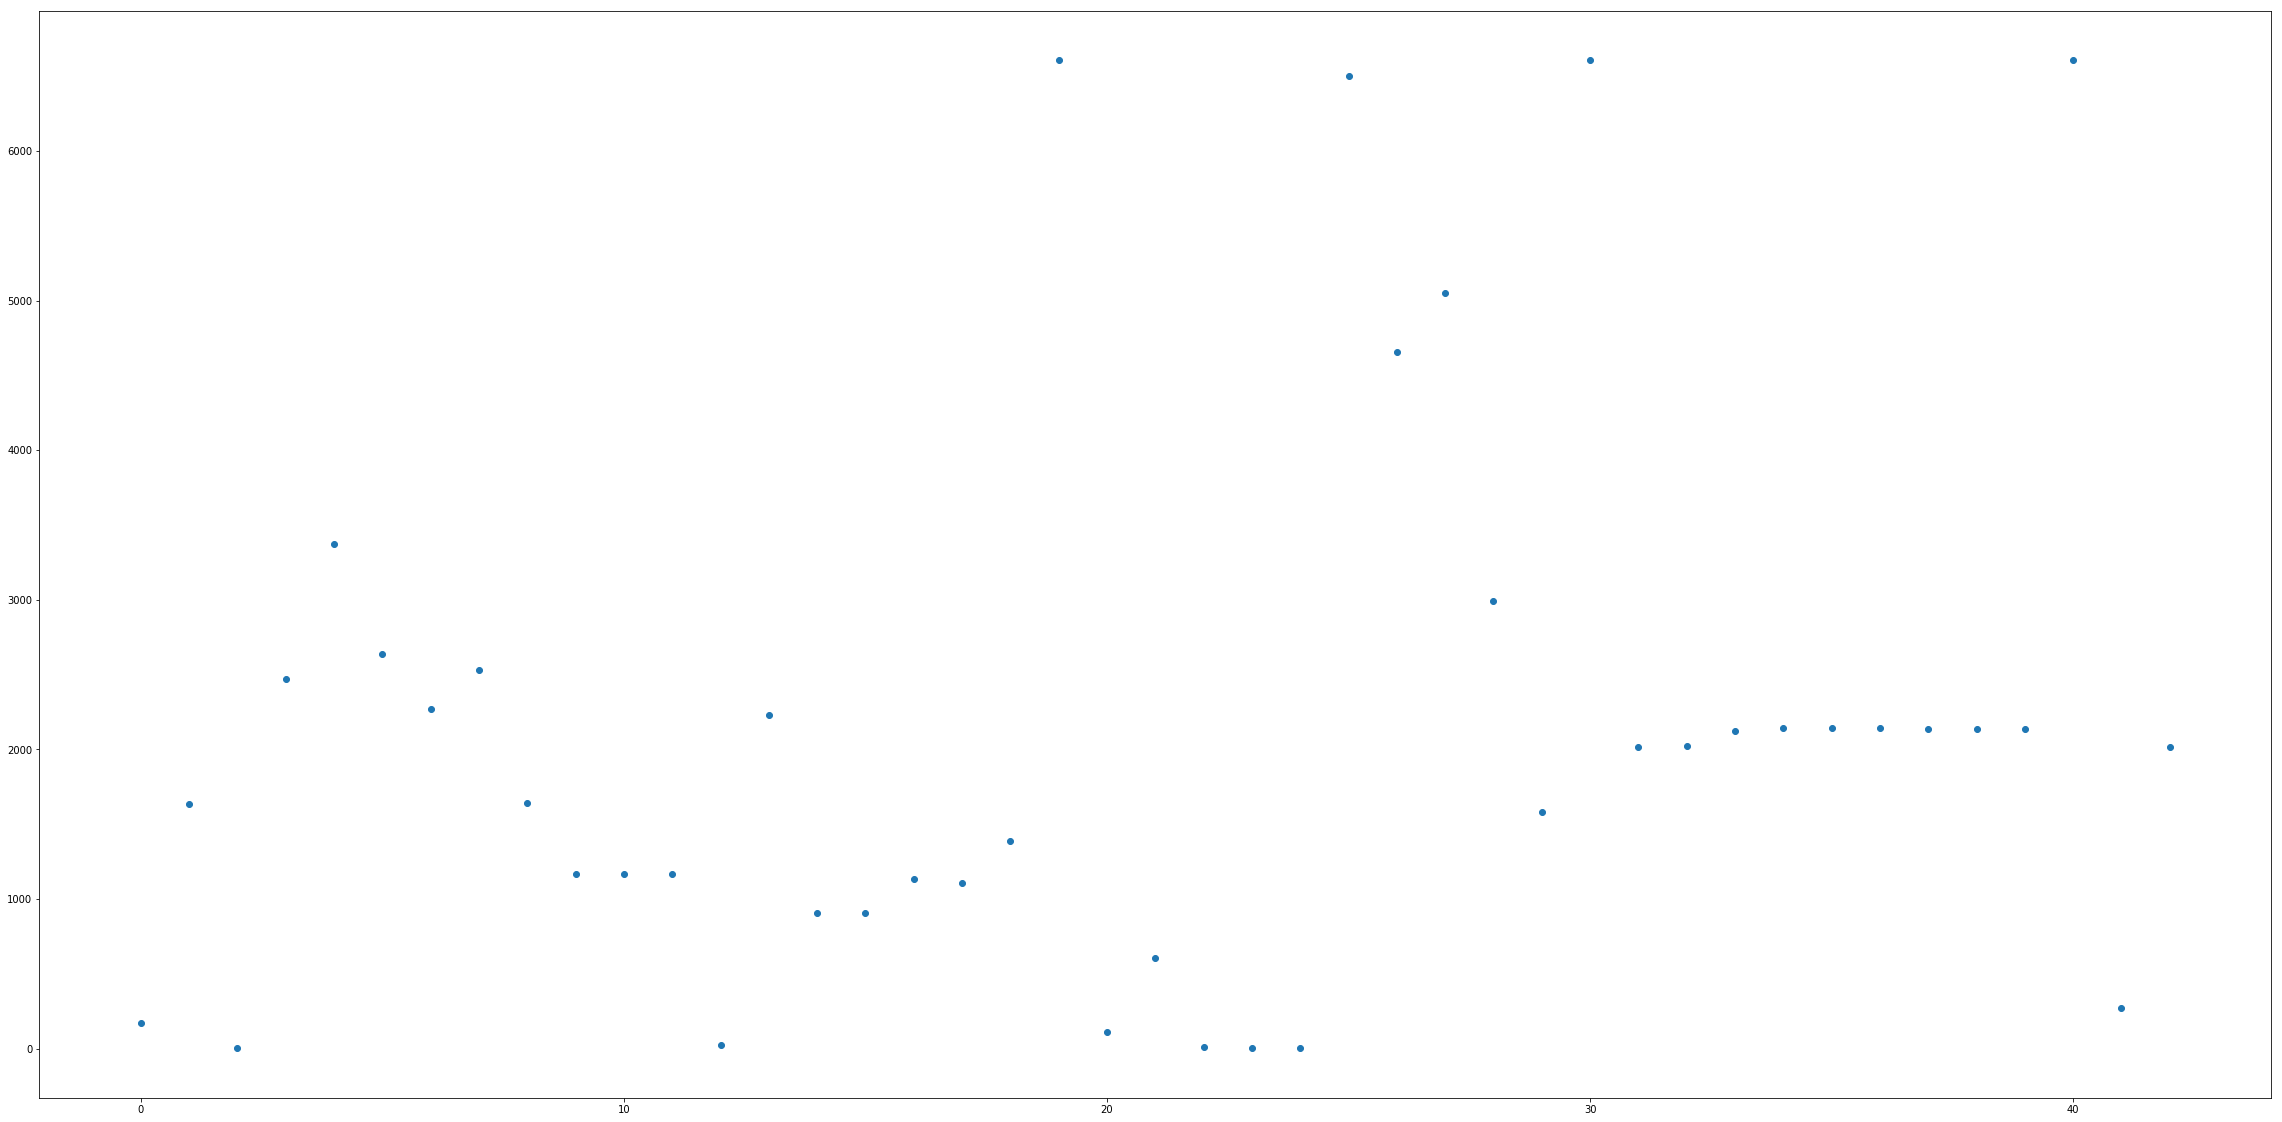

In [31]:
plt.figure(figsize=(40, 20))
plt.scatter(x=[i for i in range(len(null_cols_orig))],y=[listings_original[null_cols_orig].isnull().sum()])
#plt.xlabel([i for i in range(len(listings[listings.isnull().any(axis=1)].columns))])
plt.show()

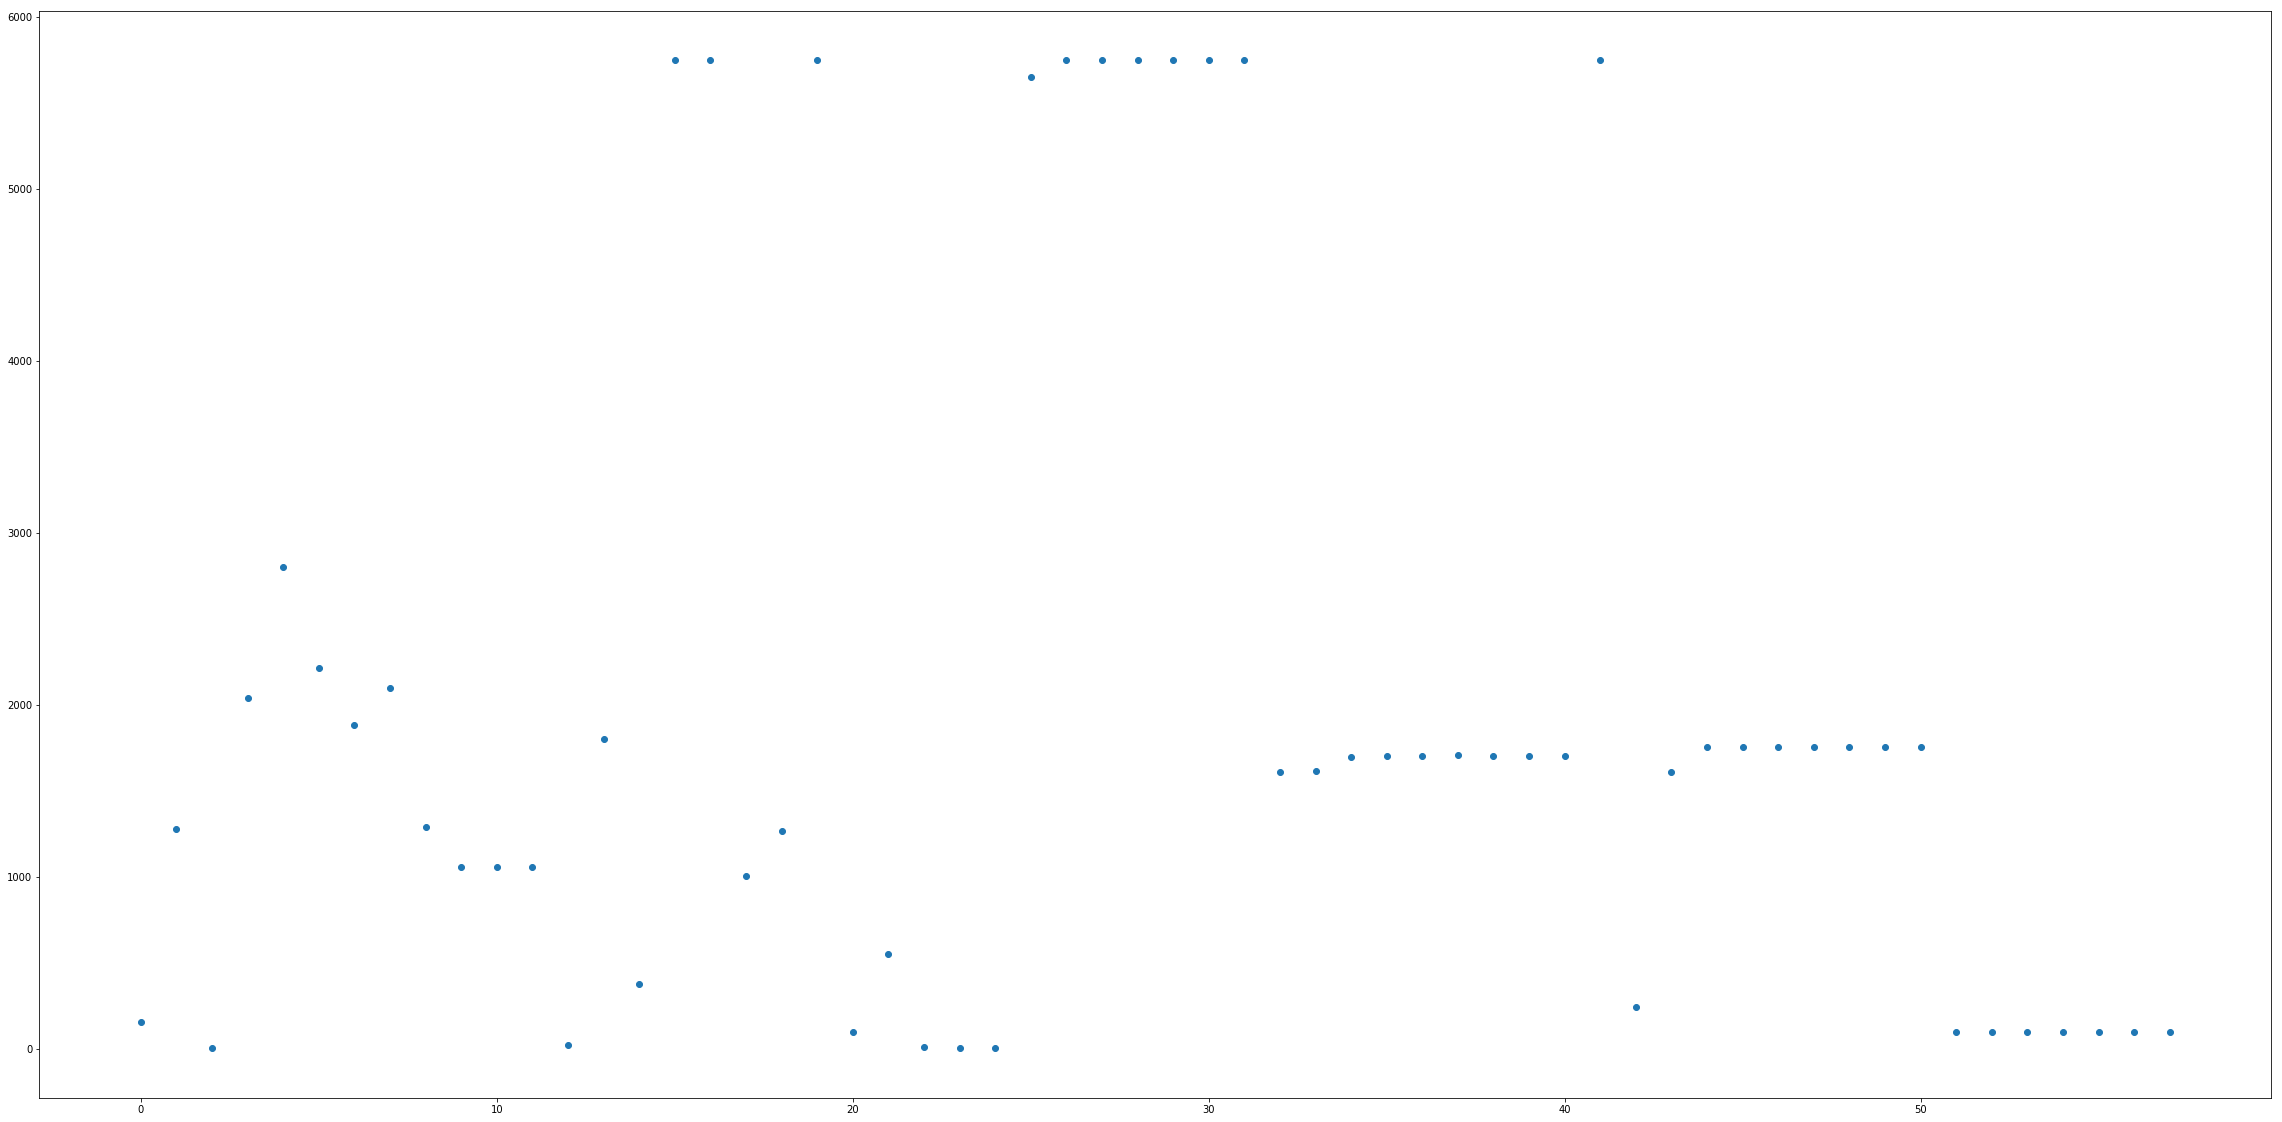

In [32]:
plt.figure(figsize=(40, 20))
plt.scatter(x=[i for i in range(len(null_cols))],y=[listings[null_cols].isnull().sum()])
#plt.xlabel([i for i in range(len(listings[listings.isnull().any(axis=1)].columns))])
plt.show()

In [33]:
listings[null_cols].isnull().sum()

summary                          157
space                           1275
description                        1
neighborhood_overview           2041
notes                           2800
transit                         2213
access                          1884
interaction                     2097
house_rules                     1292
thumbnail_url                   1057
medium_url                      1057
xl_picture_url                  1057
host_location                     18
host_about                      1804
host_response_time               377
host_response_rate              5752
host_acceptance_rate            5752
host_neighbourhood              1005
neighbourhood                   1268
neighbourhood_group_cleansed    5752
zipcode                           96
market                           548
bathrooms                         10
bedrooms                           3
beds                               4
square_feet                     5652
weekly_price                    5752
m

In [34]:
listings_original[null_cols_orig].isnull().sum()

summary                          173
space                           1635
description                        2
neighborhood_overview           2471
notes                           3375
transit                         2636
access                          2273
interaction                     2530
house_rules                     1642
thumbnail_url                   1166
medium_url                      1166
xl_picture_url                  1166
host_location                     24
host_about                      2228
host_response_time               910
host_response_rate               910
host_acceptance_rate            1131
host_neighbourhood              1107
neighbourhood                   1387
neighbourhood_group_cleansed    6608
zipcode                          109
market                           605
bathrooms                         11
bedrooms                           3
beds                               4
square_feet                     6503
weekly_price                    4654
m

Nulls Analysis

Features that we will not use for modeling no matter what:
thumbnail_url, medium_url, xl_picture_url, 
first_review                    2018
last_review                     2024
jurisdiction_names               273
host_location (bad data)
market (bad data)



Features that have high number of nulls and will definitely be deleted:
    neighbourhood_group_cleansed, square_feet, weekly_price, monthly_price, security_deposit, has_availability, license

Features that have significant number of nulls and might potentially be deleted: 
    Text: space, neighborhood overview, notes, transit, access, interaction, house rules, host_about, 

Features that have many nulls and we may or may not be able to impute:
host_response_time               910
host_response_rate               910
host_acceptance_rate            1131
host_neighbourhood              1107
neighbourhood                   1387
cleaning_fee                    1584
review_scores_rating            2126
review_scores_accuracy          2142
review_scores_cleanliness       2141
review_scores_checkin           2143
review_scores_communication     2139
review_scores_location          2140
review_scores_value             2140

Features that have few nulls and can be imputed easily:
summary                          173
description                        2
zipcode                          109
bathrooms                         11
bedrooms                           3
beds                               4

In [38]:
listings_original.market.unique()

array(['San Diego', nan, 'Carlsbad', 'Sacramento', 'Las Vegas',
       'Temecula Valley', 'Other (International)', 'Fresno',
       'Coastal Orange County', 'Chicago', 'Other (Domestic)'],
      dtype=object)

# Exploring features that have no nulls

In [42]:
[col for col in listings_original.columns if col not in null_cols_orig]

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'experiences_offered',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood_cleansed',
 'city',
 'state',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bed_type',
 'amenities',
 'price',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'calendar_updated',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'calendar_last_scraped',
 'number_of_reviews',
 'requires_license',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'calculated_host_listings_count']

In [49]:
listings_original.host_is_superhost.unique()

array(['f', 't'], dtype=object)

Features that will not be used for modeling:
'id',
'listing_url',
'scrape_id',
'last_scraped',
'picture_url',
'host_id',
'host_url',
'host_name',
'experiences_offered' (has all 'none'),
host_thumbnail_url',
'host_picture_url',
'host_has_profile_pic',
'street' (already have lat, long, and other geo features)
'state',
'smart_location' (using more exact geo data)
'country_code',
'country',
'is_location_exact',
'bed_type',







In [ ]:
Features that contain potentially useful info:
    name (contains listing headline) - a text column
    

In [ ]:
Features we will use in transformed form:
    amenities, host_verifications,
    

Exploring the features Visually:

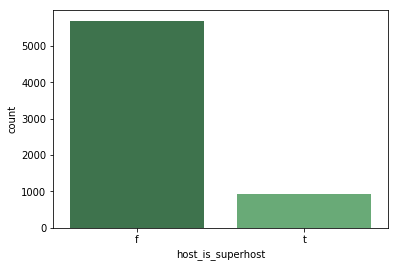

In [61]:
sb.countplot(x="host_is_superhost", data=listings_original, palette="Greens_d");

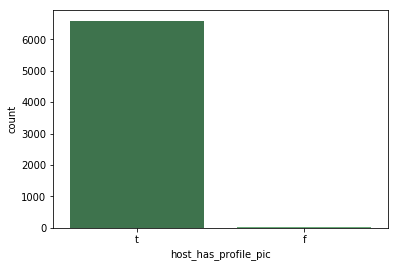

In [63]:
sb.countplot(x="host_has_profile_pic", data=listings_original, palette="Greens_d");

Insight: probably useless to use host_has_profile_pic

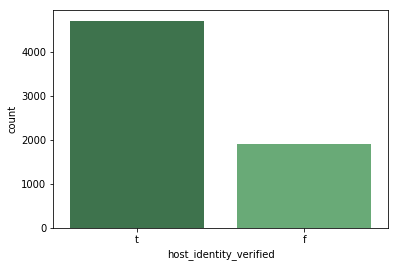

In [64]:
sb.countplot(x="host_identity_verified", data=listings_original, palette="Greens_d");

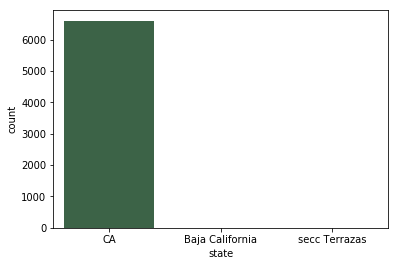

In [66]:
sb.countplot(x="state", data=listings_original, palette="Greens_d");

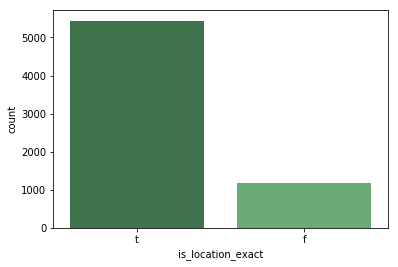

In [73]:
sb.countplot(x="is_location_exact", data=listings_original, palette="Greens_d");

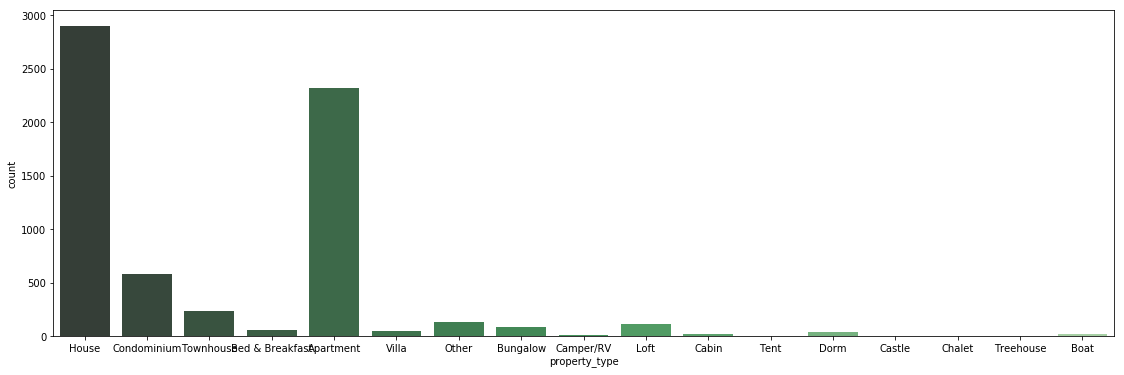

In [86]:
fig, ax = plt.subplots(figsize=(19,6))
sb.countplot(ax=ax,x="property_type", data=listings_original, palette="Greens_d");

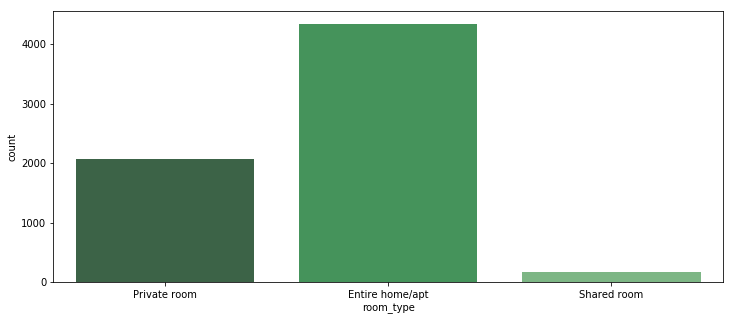

In [85]:
fig, ax = plt.subplots(figsize=(12,5))
sb.countplot(ax=ax,x="room_type", data=listings_original, palette="Greens_d");

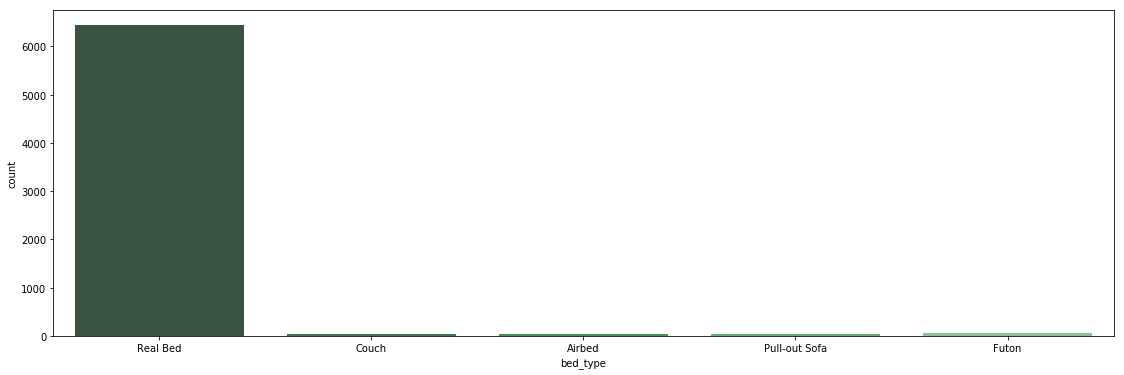

In [116]:
fig, ax = plt.subplots(figsize=(19,6))
sb.countplot(ax=ax,x="bed_type", data=listings_original, palette="Greens_d");

Insight: will not use bed type

In [ ]:
fig, ax = plt.subplots(figsize=(19,6))
sb.countplot(ax=ax,x=, data=listings_original, palette="Greens_d");

Plotting Features Related to Listing Size

In [133]:
cols = ['accommodates','bathrooms', 'bedrooms', 'beds']

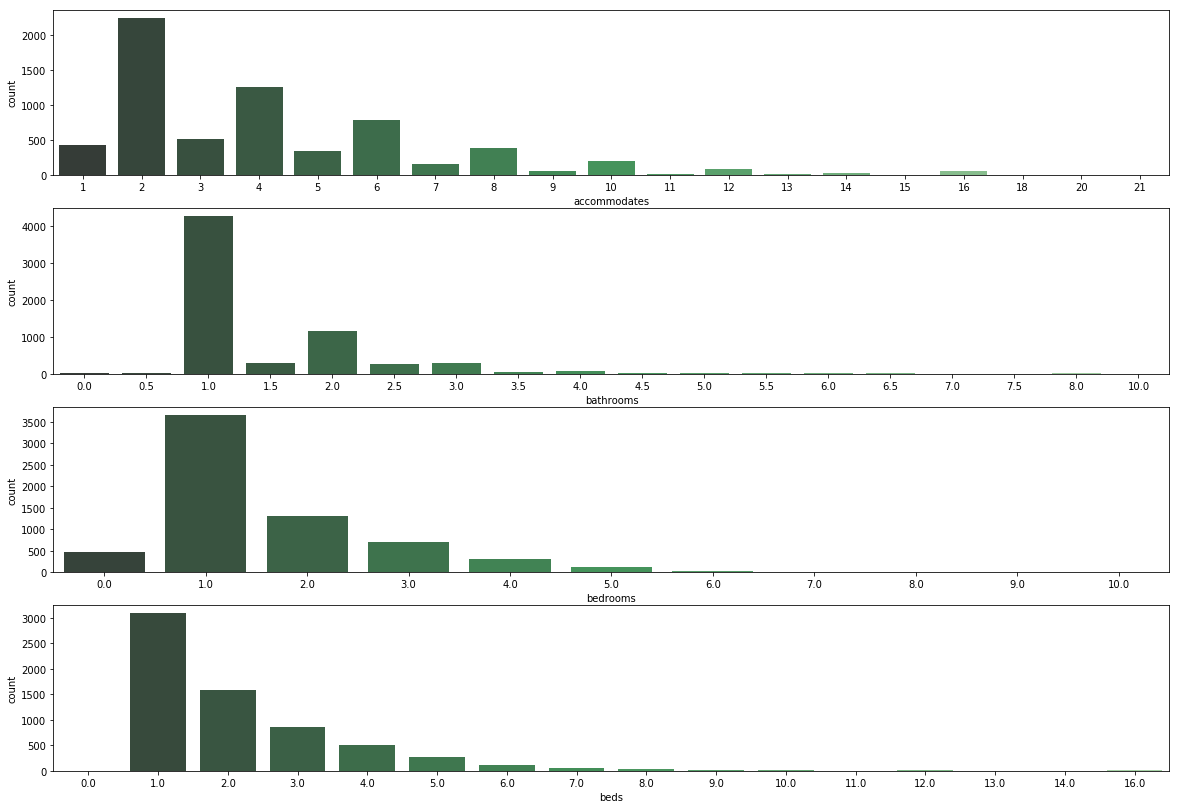

In [136]:
fig, axes = plt.subplots(nrows = len(cols), ncols = 1, sharex = False, sharey= False, figsize = (20,14))
for i,val in enumerate(cols):
    sb.countplot(ax=axes[i],x=val, data=listings_original, palette="Greens_d");

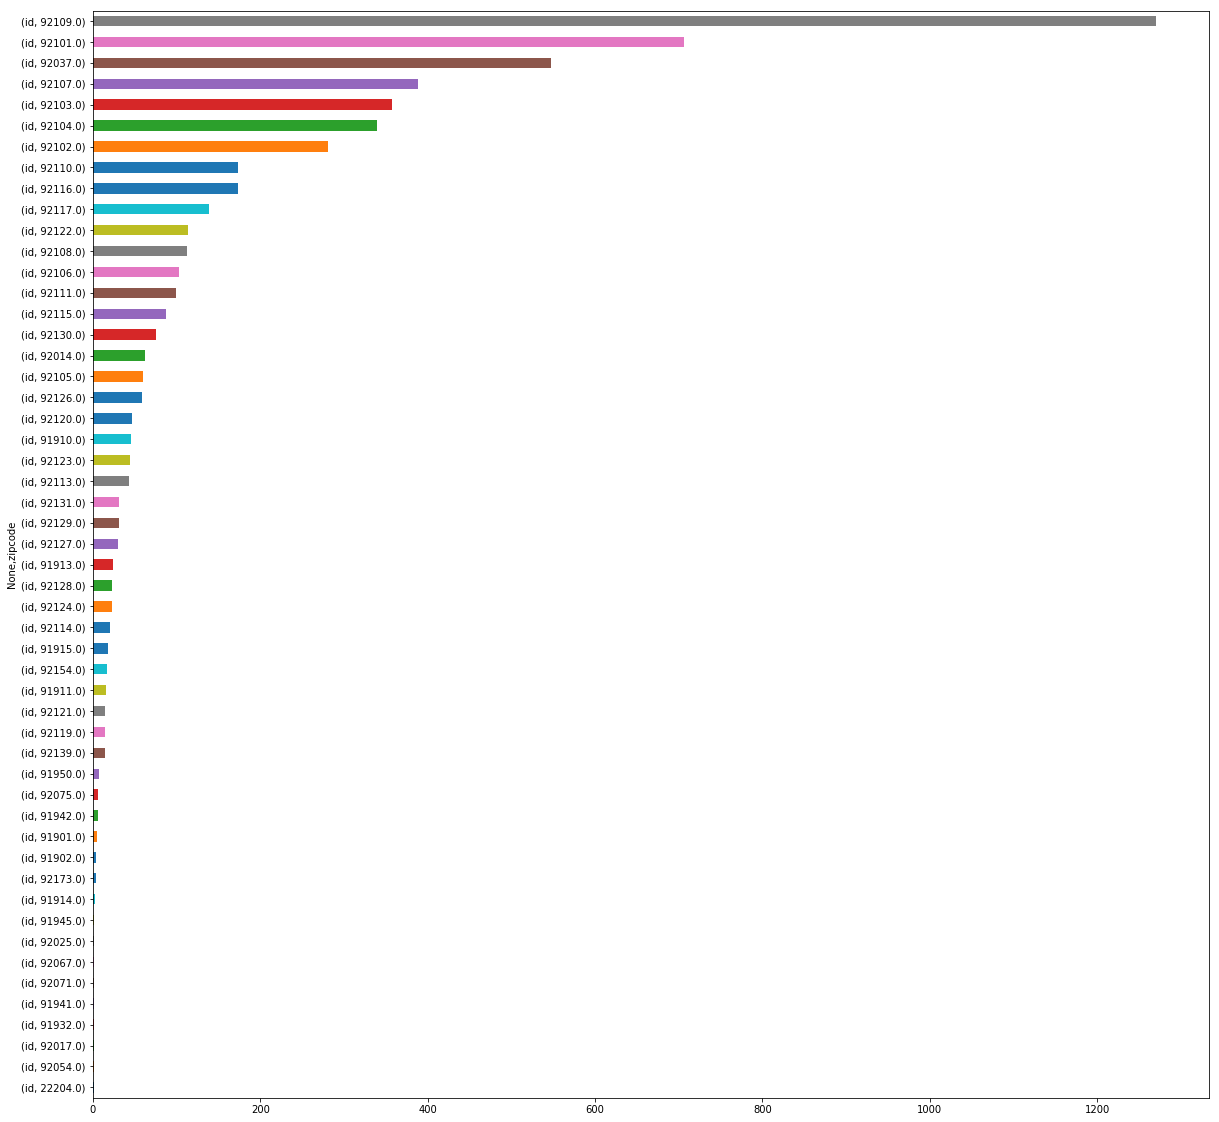

In [132]:
temp = listings.copy()
temp['zipcode'] = temp['zipcode'].astype(float)
nghbrd_list_count = temp[['zipcode','id']].groupby(['zipcode'])

plt.figure()
nghbrd_list_count.count().sort_values(by='id').unstack().plot(kind='barh', figsize=(20,20))
plt.show()

Amenities Visualization 

In [176]:
has = listings.filter(regex='has')
has = has.drop(columns=['host_has_profile_pic', 'has_availability', 'has', 'host_has_profile_pic_bin'])

In [177]:
len(has_df)

43

In [182]:
has_df = pd.DataFrame(has.sum(), columns=['Sum'])
has_df = has_df.sort_values(by='Sum')

In [183]:
has_df['Amenity'] = has_df.index

In [184]:
has_df['Amenity'] = has_df['Amenity'].astype(str)

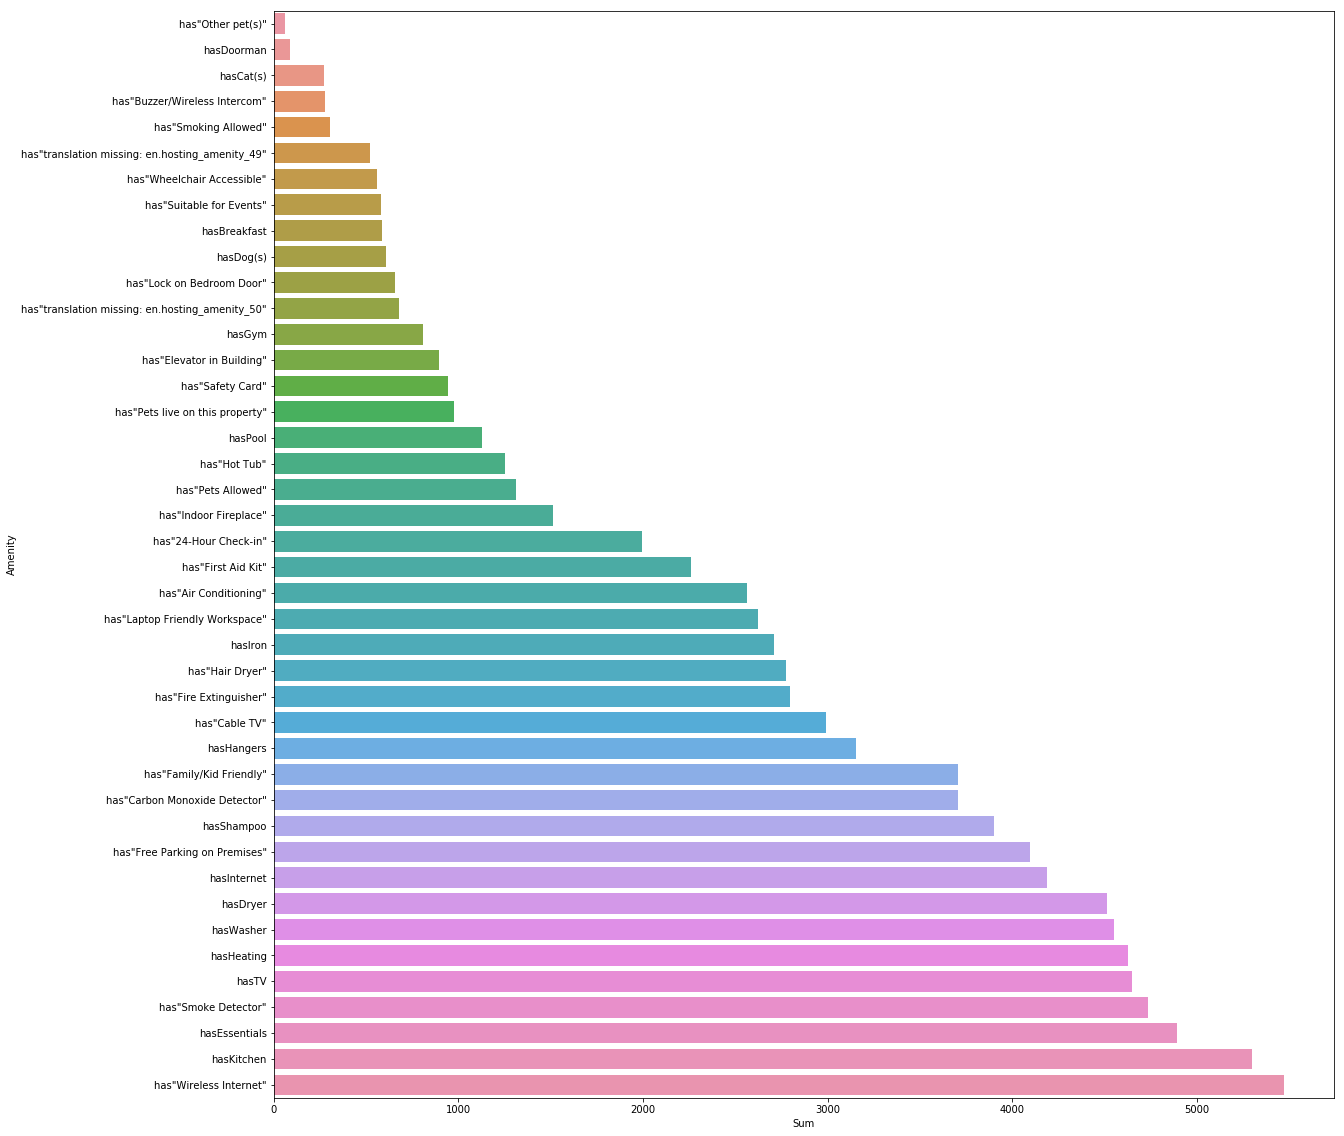

In [185]:
fig, ax = plt.subplots(figsize=(19,20))
sb.barplot(ax = ax, y=has_df['Amenity'], x=has_df['Sum'], data=has_df);

Cols to do next:
    'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'calendar_updated',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'calendar_last_scraped',
 'number_of_reviews',
 'requires_license',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'calculated_host_listings_count'

Insight: Will discard state also

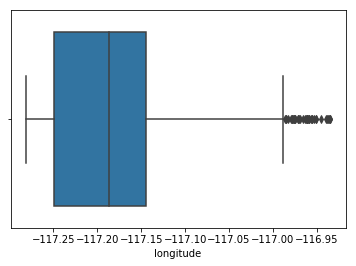

In [71]:
ax = sb.boxplot(x="longitude", data=listings_original)

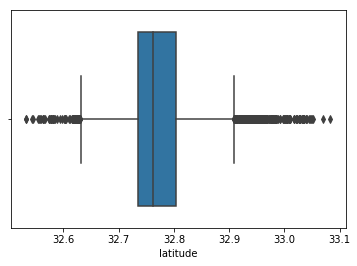

In [72]:
ax = sb.boxplot(x="latitude", data=listings_original)

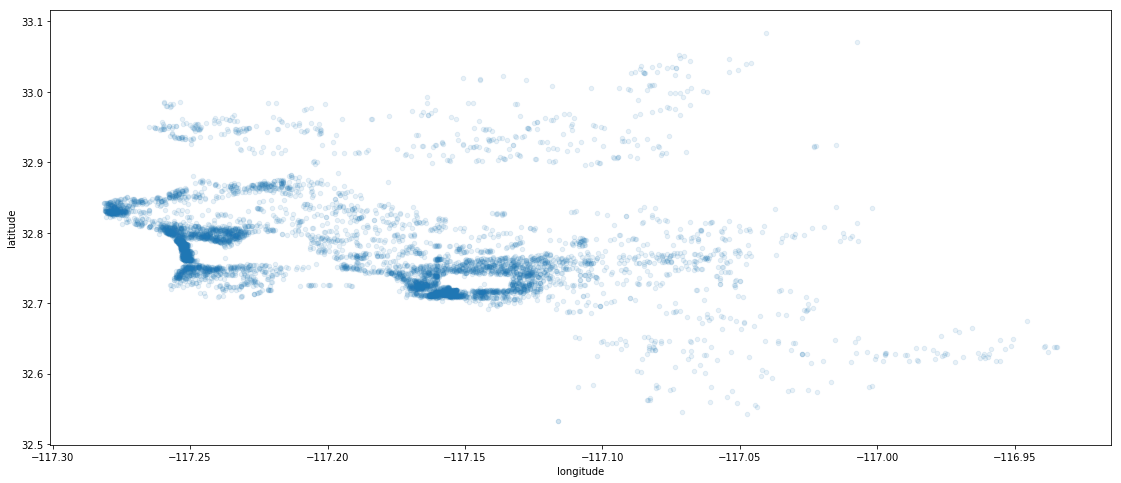

In [82]:
fig, ax = plt.subplots(figsize=(19,8))
listings_original.plot(ax=ax,kind='scatter',x='longitude',y='latitude', alpha=0.1)

In [ ]:
fig, ax = plt.subplots(figsize=(19,6))
sb.countplot(ax=ax,x="property_type", data=listings_original, palette="Greens_d");

Price Variable (Target Var)

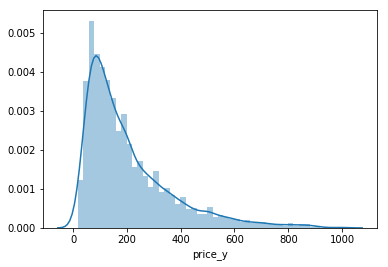

In [98]:
sb.distplot(listings['price_y'])

Now plotting transformations of price 

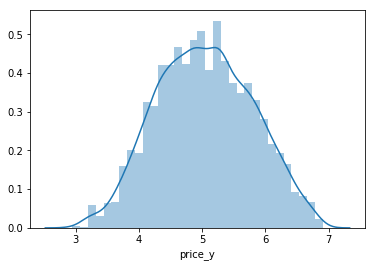

In [100]:
sb.distplot(np.log(listings['price_y']))

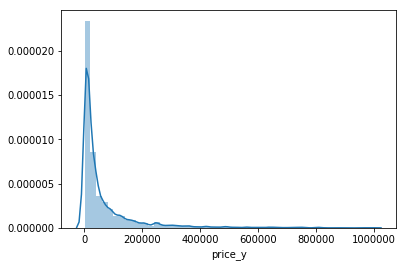

In [102]:
sb.distplot(listings['price_y']**2)

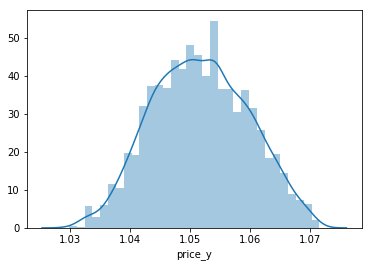

In [112]:
sb.distplot(listings['price_y']**(0.01))

In [ ]:
'host_listings_count',
 'host_total_listings_count',